# Duplicate Question Par ditection:

1. Approah of hyperparameter tuning of the final model produced...

2. Deep learnn=ing approach using Steming, TQDM and LSTM 

In [ ]:
!pip install distance -q
!pip install fuzzywuzzy -q

     |████████████████████████████████| 180 kB 6.5 MB/s 


## A Deep Learning Approach:

In [ ]:
# Importing the necessary libraries:

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from string import punctuation

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Bidirectional
from tensorflow.keras import layers, utils, callbacks, optimizers, regularizers
from tqdm import tqdm

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # to check the number of gpu available

Num GPUs Available:  1


In [ ]:
# Reading the file

FILE = "/content/drive/MyDrive/DL/NLP/train.csv"
train = pd.read_csv(FILE)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/DL/NLP/test.csv")

In [ ]:
# Preprocessing: 

def clean_dataframe_train(train):
    stop_words = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'Is','If','While','This']
    def text_to_wordlist(text, remove_stop_words=True, stem_words=False):
        text = re.sub(r"[^A-Za-z0-9]", " ", text)
        text = re.sub(r"what's", "", text)
        text = re.sub(r"What's", "", text)
        text = re.sub(r"\'s", " ", text)
        text = re.sub(r"\'ve", " have ", text)
        text = re.sub(r"can't", "cannot ", text)
        text = re.sub(r"n't", " not ", text)
        text = re.sub(r"I'm", "I am", text)
        text = re.sub(r" m ", " am ", text)
        text = re.sub(r"\'re", " are ", text)
        text = re.sub(r"\'d", " would ", text)
        text = re.sub(r"\'ll", " will ", text)
        text = re.sub(r"60k", " 60000 ", text)
        text = re.sub(r" e g ", " eg ", text)
        text = re.sub(r" b g ", " bg ", text)
        text = re.sub(r"\0s", "0", text)
        text = re.sub(r" 9 11 ", "911", text)
        text = re.sub(r"e-mail", "email", text)
        text = re.sub(r"\s{2,}", " ", text)
        text = re.sub(r"quikly", "quickly", text)
        text = re.sub(r" usa ", " America ", text)
        text = re.sub(r" USA ", " America ", text)
        text = re.sub(r" u s ", " America ", text)
        text = re.sub(r" uk ", " England ", text)
        text = re.sub(r" UK ", " England ", text)
        text = re.sub(r"india", "India", text)
        text = re.sub(r"switzerland", "Switzerland", text)
        text = re.sub(r"china", "China", text)
        text = re.sub(r"chinese", "Chinese", text) 
        text = re.sub(r"imrovement", "improvement", text)
        text = re.sub(r"intially", "initially", text)
        text = re.sub(r"quora", "Quora", text)
        text = re.sub(r" dms ", "direct messages ", text)  
        text = re.sub(r"demonitization", "demonetization", text) 
        text = re.sub(r"actived", "active", text)
        text = re.sub(r"kms", " kilometers ", text)
        text = re.sub(r"KMs", " kilometers ", text)
        text = re.sub(r" cs ", " computer science ", text) 
        text = re.sub(r" upvotes ", " up votes ", text)
        text = re.sub(r" iPhone ", " phone ", text)
        text = re.sub(r"\0rs ", " rs ", text) 
        text = re.sub(r"calender", "calendar", text)
        text = re.sub(r"ios", "operating system", text)
        text = re.sub(r"gps", "GPS", text)
        text = re.sub(r"gst", "GST", text)
        text = re.sub(r"programing", "programming", text)
        text = re.sub(r"bestfriend", "best friend", text)
        text = re.sub(r"dna", "DNA", text)
        text = re.sub(r"III", "3", text) 
        text = re.sub(r"the US", "America", text)
        text = re.sub(r"Astrology", "astrology", text)
        text = re.sub(r"Method", "method", text)
        text = re.sub(r"Find", "find", text) 
        text = re.sub(r"banglore", "Banglore", text)
        text = re.sub(r" J K ", " JK ", text)

        text = ''.join([c for c in text if c not in punctuation])

        if remove_stop_words:
            text = text.split()
            text = [w for w in text if not w in stop_words]
            text = " ".join(text)

        if stem_words:
            text = text.split()
            stemmer = SnowballStemmer('english')
            stemmed_words = [stemmer.stem(word) for word in text]
            text = " ".join(stemmed_words)

        return(text)
    
    def process_questions(question_list, questions, question_list_name, dataframe):
        for question in questions:
            question_list.append(text_to_wordlist(str(question)))
            if len(question_list) % 100000 == 0:
                progress = len(question_list)/len(dataframe) * 100
                print("{} is {}% complete.".format(question_list_name, round(progress, 1)))
            
    
    train_question1 = []
    process_questions(train_question1, train.question1, 'train_question1', train)

    train_question2 = []
    process_questions(train_question2, train.question2, 'train_question2', train)

    train["question1"] = train_question1
    train["question2"] = train_question2
    
    return train

In [ ]:
def clean_dataframe_test(test):
    stop_words = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'Is','If','While','This']
    def text_to_wordlist(text, remove_stop_words=True, stem_words=False):
        text = re.sub(r"[^A-Za-z0-9]", " ", text)
        text = re.sub(r"what's", "", text)
        text = re.sub(r"What's", "", text)
        text = re.sub(r"\'s", " ", text)
        text = re.sub(r"\'ve", " have ", text)
        text = re.sub(r"can't", "cannot ", text)
        text = re.sub(r"n't", " not ", text)
        text = re.sub(r"I'm", "I am", text)
        text = re.sub(r" m ", " am ", text)
        text = re.sub(r"\'re", " are ", text)
        text = re.sub(r"\'d", " would ", text)
        text = re.sub(r"\'ll", " will ", text)
        text = re.sub(r"60k", " 60000 ", text)
        text = re.sub(r" e g ", " eg ", text)
        text = re.sub(r" b g ", " bg ", text)
        text = re.sub(r"\0s", "0", text)
        text = re.sub(r" 9 11 ", "911", text)
        text = re.sub(r"e-mail", "email", text)
        text = re.sub(r"\s{2,}", " ", text)
        text = re.sub(r"quikly", "quickly", text)
        text = re.sub(r" usa ", " America ", text)
        text = re.sub(r" USA ", " America ", text)
        text = re.sub(r" u s ", " America ", text)
        text = re.sub(r" uk ", " England ", text)
        text = re.sub(r" UK ", " England ", text)
        text = re.sub(r"india", "India", text)
        text = re.sub(r"switzerland", "Switzerland", text)
        text = re.sub(r"china", "China", text)
        text = re.sub(r"chinese", "Chinese", text) 
        text = re.sub(r"imrovement", "improvement", text)
        text = re.sub(r"intially", "initially", text)
        text = re.sub(r"quora", "Quora", text)
        text = re.sub(r" dms ", "direct messages ", text)  
        text = re.sub(r"demonitization", "demonetization", text) 
        text = re.sub(r"actived", "active", text)
        text = re.sub(r"kms", " kilometers ", text)
        text = re.sub(r"KMs", " kilometers ", text)
        text = re.sub(r" cs ", " computer science ", text) 
        text = re.sub(r" upvotes ", " up votes ", text)
        text = re.sub(r" iPhone ", " phone ", text)
        text = re.sub(r"\0rs ", " rs ", text) 
        text = re.sub(r"calender", "calendar", text)
        text = re.sub(r"ios", "operating system", text)
        text = re.sub(r"gps", "GPS", text)
        text = re.sub(r"gst", "GST", text)
        text = re.sub(r"programing", "programming", text)
        text = re.sub(r"bestfriend", "best friend", text)
        text = re.sub(r"dna", "DNA", text)
        text = re.sub(r"III", "3", text) 
        text = re.sub(r"the US", "America", text)
        text = re.sub(r"Astrology", "astrology", text)
        text = re.sub(r"Method", "method", text)
        text = re.sub(r"Find", "find", text) 
        text = re.sub(r"banglore", "Banglore", text)
        text = re.sub(r" J K ", " JK ", text)

        text = ''.join([c for c in text if c not in punctuation])

        if remove_stop_words:
            text = text.split()
            text = [w for w in text if not w in stop_words]
            text = " ".join(text)

        if stem_words:
            text = text.split()
            stemmer = SnowballStemmer('english')
            stemmed_words = [stemmer.stem(word) for word in text]
            text = " ".join(stemmed_words)

        return(text)
    
    def process_questions(question_list, questions, question_list_name, dataframe):
        for question in questions:
            question_list.append(text_to_wordlist(str(question)))
            if len(question_list) % 100000 == 0:
                progress = len(question_list)/len(dataframe) * 100
                print("{} is {}% complete.".format(question_list_name, round(progress, 1)))
            
    
    test_question1 = []
    process_questions(test_question1, test.question1, 'test_question1', test)

    test_question2 = []
    process_questions(test_question2, test.question2, 'test_question2', test)

    test["question1"] = test_question1
    test["question2"] = test_question2
    
    return test

In [ ]:
train = clean_dataframe_train(train)
test = clean_dataframe_test(test)

train_question1 is 24.7% complete.
train_question1 is 49.5% complete.
train_question1 is 74.2% complete.
train_question1 is 98.9% complete.
train_question2 is 24.7% complete.
train_question2 is 49.5% complete.
train_question2 is 74.2% complete.
train_question2 is 98.9% complete.
test_question1 is 2.8% complete.
test_question1 is 5.6% complete.
test_question1 is 8.4% complete.
test_question1 is 11.2% complete.
test_question1 is 14.0% complete.
test_question1 is 16.8% complete.
test_question1 is 19.6% complete.
test_question1 is 22.4% complete.
test_question1 is 25.3% complete.
test_question1 is 28.1% complete.
test_question1 is 30.9% complete.
test_question1 is 33.7% complete.
test_question1 is 36.5% complete.
test_question1 is 39.3% complete.
test_question1 is 42.1% complete.
test_question1 is 44.9% complete.
test_question1 is 47.7% complete.
test_question1 is 50.5% complete.
test_question1 is 53.3% complete.
test_question1 is 56.1% complete.
test_question1 is 58.9% complete.
test_ques

In [ ]:
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 300


corpus = []  # creating corpus for performing tokenization

feats = ['question1','question2']
for f in feats:
    train[f] = train[f].astype(str)
    test[f] = test[f].astype(str)
    corpus+=train[f].values.tolist()
    
# performing tokenization:   
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# converting tokens of text corpus into a sequence of integers: 
X_q1 = tokenizer.texts_to_sequences(train['question1'])
X_q2 = tokenizer.texts_to_sequences(train['question2'])

X_test_q1 = tokenizer.texts_to_sequences(test['question1'])
X_test_q2 = tokenizer.texts_to_sequences(test['question2'])

# Padding ops: truncation of sequence to the limit of max_seq_len
X_q1 = pad_sequences(X_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_q2 = pad_sequences(X_q2, maxlen=MAX_SEQUENCE_LENGTH)
X_test_q1 = pad_sequences(X_test_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_test_q2 = pad_sequences(X_test_q2, maxlen=MAX_SEQUENCE_LENGTH)

y = train['is_duplicate'].values

word_index = tokenizer.word_index
nb_words = len(word_index)+1

In [ ]:
# glove_file_unzip

import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/DL/NLP/glove.840B.300d.txt.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/DL/NLP")

In [ ]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')

def load_embeddings(path):
    with open(path) as f:
        return dict(get_coefs(*line.strip().split(' ')) for line in tqdm(f))

def build_matrix(word_index, path):
    embedding_index = load_embeddings(path)
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    unknown_words = []
    
    for word, i in word_index.items():
        try:
            embedding_matrix[i] = embedding_index[word]
        except KeyError:
            unknown_words.append(word)
    return embedding_matrix, unknown_words

glove_path = '/content/drive/MyDrive/DL/NLP/glove.840B.300d.txt'
embedding_matrix,unknown_words = build_matrix(word_index,glove_path)

2196018it [02:02, 17894.33it/s]


In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
X_train_q1,X_val_q1,X_train_q2,X_val_q2,y_train,y_val = train_test_split(X_q1,X_q2,y,train_size=0.8,random_state=1024)
print(X_train_q1.shape,X_val_q1.shape)
X_train = [X_train_q1,X_train_q2]
X_val = [X_val_q1,X_val_q2]
X_test = [X_test_q1,X_test_q2]

(323432, 100) (80858, 100)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 300)     25627500    ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 128)          186880      ['embedding[0][0]',          

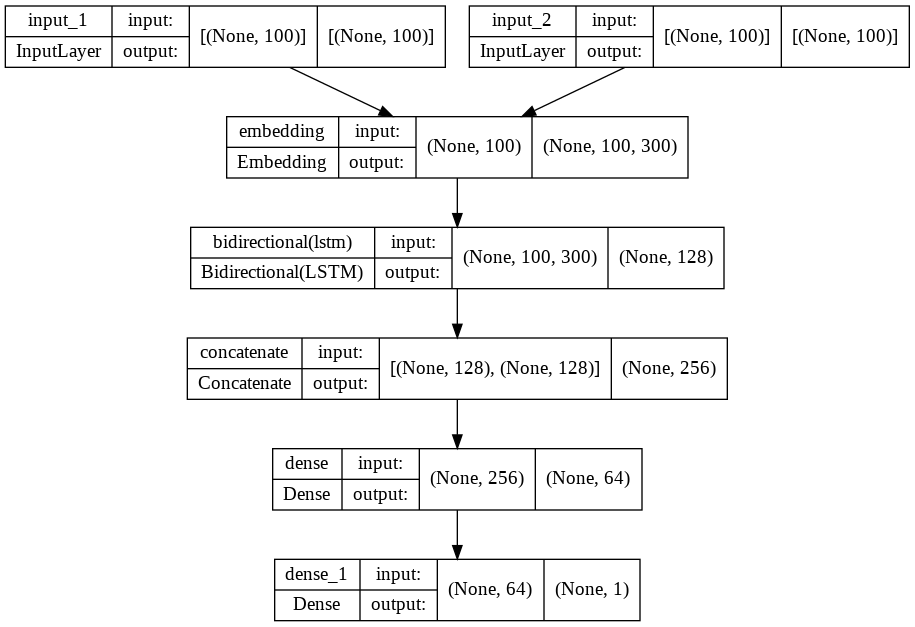

In [ ]:
input_q1 = Input(shape = X_train[0].shape[1])
input_q2 = Input(shape = X_train[0].shape[1])

embedding_layer = Embedding(nb_words,
                            EMBEDDING_DIM,
                            input_length = X_train[0].shape[1],
                            weights = [embedding_matrix],
                            trainable=False)


embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

bilstm_layer = Bidirectional(LSTM(64, return_sequences=False))

x1 = bilstm_layer(embedded_sequences_q1)
x2 = bilstm_layer(embedded_sequences_q2)


distance = layers.Concatenate()([x1, x2])
x = Dense(64, activation="relu")(distance)
preds = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input_q1, input_q2], outputs=preds)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])



model.summary()
utils.plot_model(model, show_shapes=True, expand_nested=True)

In [ ]:
es = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, restore_best_weights=True
)

rlp = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, min_lr=1e-10, mode='min', verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32, 
    epochs=100,
    callbacks=[es, rlp]
)

Epoch 1/100
10108/10108 [==============================] - 231s 22ms/step - loss: 0.4617 - accuracy: 0.7734 - val_loss: 0.4177 - val_accuracy: 0.8014 - lr: 0.0010
Epoch 2/100
10108/10108 [==============================] - 214s 21ms/step - loss: 0.3822 - accuracy: 0.8220 - val_loss: 0.3918 - val_accuracy: 0.8166 - lr: 0.0010
Epoch 3/100
10108/10108 [==============================] - 214s 21ms/step - loss: 0.3418 - accuracy: 0.8450 - val_loss: 0.3876 - val_accuracy: 0.8207 - lr: 0.0010
Epoch 4/100
10108/10108 [==============================] - 211s 21ms/step - loss: 0.3114 - accuracy: 0.8614 - val_loss: 0.3821 - val_accuracy: 0.8278 - lr: 0.0010
Epoch 5/100
10108/10108 [==============================] - 208s 21ms/step - loss: 0.2868 - accuracy: 0.8737 - val_loss: 0.3839 - val_accuracy: 0.8318 - lr: 0.0010
Epoch 6/100
10106/10108 [============================>.] - ETA: 0s - loss: 0.2665 - accuracy: 0.8845
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10108/10

In [ ]:
y_pred_test = model.predict(X_test)

result = pd.DataFrame()
result['test_id'] = test['test_id']
result['is_duplicate'] = y_pred_test
#result.to_csv('result.csv',index=False)

In [ ]:
test.head(15)

,test_id,question1,question2
0,0,How does Surface Pro himself 4 compare with iP...,Why did Microsoft choose core m3 not core i3 h...
1,1,Should I have hair transplant at age 24 How mu...,How much cost does hair transplant require
2,2,best way send money from China America,you send money China
3,3,food not emulsifiers,foods fibre
4,4,How aberystwyth start reading,How their can I start reading
5,5,How are two wheeler insurance from Bharti Axa ...,I admire I am considering buying insurance fro...
6,6,How can I reduce my belly fat diet,How can I reduce my lower belly fat in one month
7,7,By scrapping 500 1000 rupee notes how RBI plan...,How will recent move declare 500 1000 denomina...
8,8,are how best books all time,are some military history books all time
9,9,After 12th years old boy I had sex with 12 yea...,Can 14 old guy date 12 year old girl


In [ ]:
result.head(15)

,test_id,is_duplicate
0,0,0.446005
1,1,0.251717
2,2,0.860270
3,3,0.000083
4,4,0.847075
5,5,0.000026
6,6,0.883514
7,7,0.992032
8,8,0.105885
9,9,0.016311


In [ ]:
result.to_csv('result.csv',index=False)